先来看一道题:

如果 a+b+c=1000，且 a^2+b^2=c^2（a,b,c 为自然数），如何求出所有a、b、c可能的组合?

第一次尝试    
* 枚举法

In [4]:
import time
start = time.time()
for i in range(0,1001):
    for j in range(0,1001):
        for k in range(0,1001):
            if i+j+k == 1000 and i**2+j**2==k**2:
                print ("a,b,c:%d,%d,%d" % (i,j,k))
end = time.time()
print("elapsed:%f" % (end-start))

a,b,c:0,500,500
a,b,c:200,375,425
a,b,c:375,200,425
a,b,c:500,0,500
elapsed:100.535807


第二次尝试 
* 由于a+b+c =1000，因此知道了a,b就可以知道c。 所以c的遍历可以省略 

In [5]:
import time
start = time.time()
for i in range(0,1001):
    for j in range(0,1001):
        k = 1000-i-j
        if i**2+j**2==k**2:
            print ("a,b,c:%d,%d,%d" % (i,j,k))
end = time.time()
print("elapsed:%f" % (end-start))

a,b,c:0,500,500
a,b,c:200,375,425
a,b,c:375,200,425
a,b,c:500,0,500
elapsed:0.794733


### 1.算法效率衡量 ,大O表示法
每台机器执行的总时间不同，但是每台机器执行的基本操作数量是大致是一样的。  
对于算法的时间效率，我们可以用“大O记法”来表示。   
* 时间复杂度：假设存在函数g，使得算法A处理规模为n的问题，所用时间为T(n)=O(g(n))，则称O(g(n))为算法A的渐近时间复杂度，简称时间复杂度，记为T(n)。    
* 表示规模为n的问题需要的时间与g(n)成正比.

时间复杂度的几条基本计算规则

* 基本操作，即只有常数项，认为其时间复杂度为O(1)
* 顺序结构，时间复杂度按加法进行计算
* 循环结构，时间复杂度按乘法进行计算
* 分支结构，时间复杂度取最大值
* 判断一个算法的效率时，往往只需要关注操作数量的最高次项，其它次要项和常数项可以忽略
* 在没有特殊说明时，我们所分析的算法的时间复杂度都是指最坏时间复杂度

常见的时间复杂度和大小关系
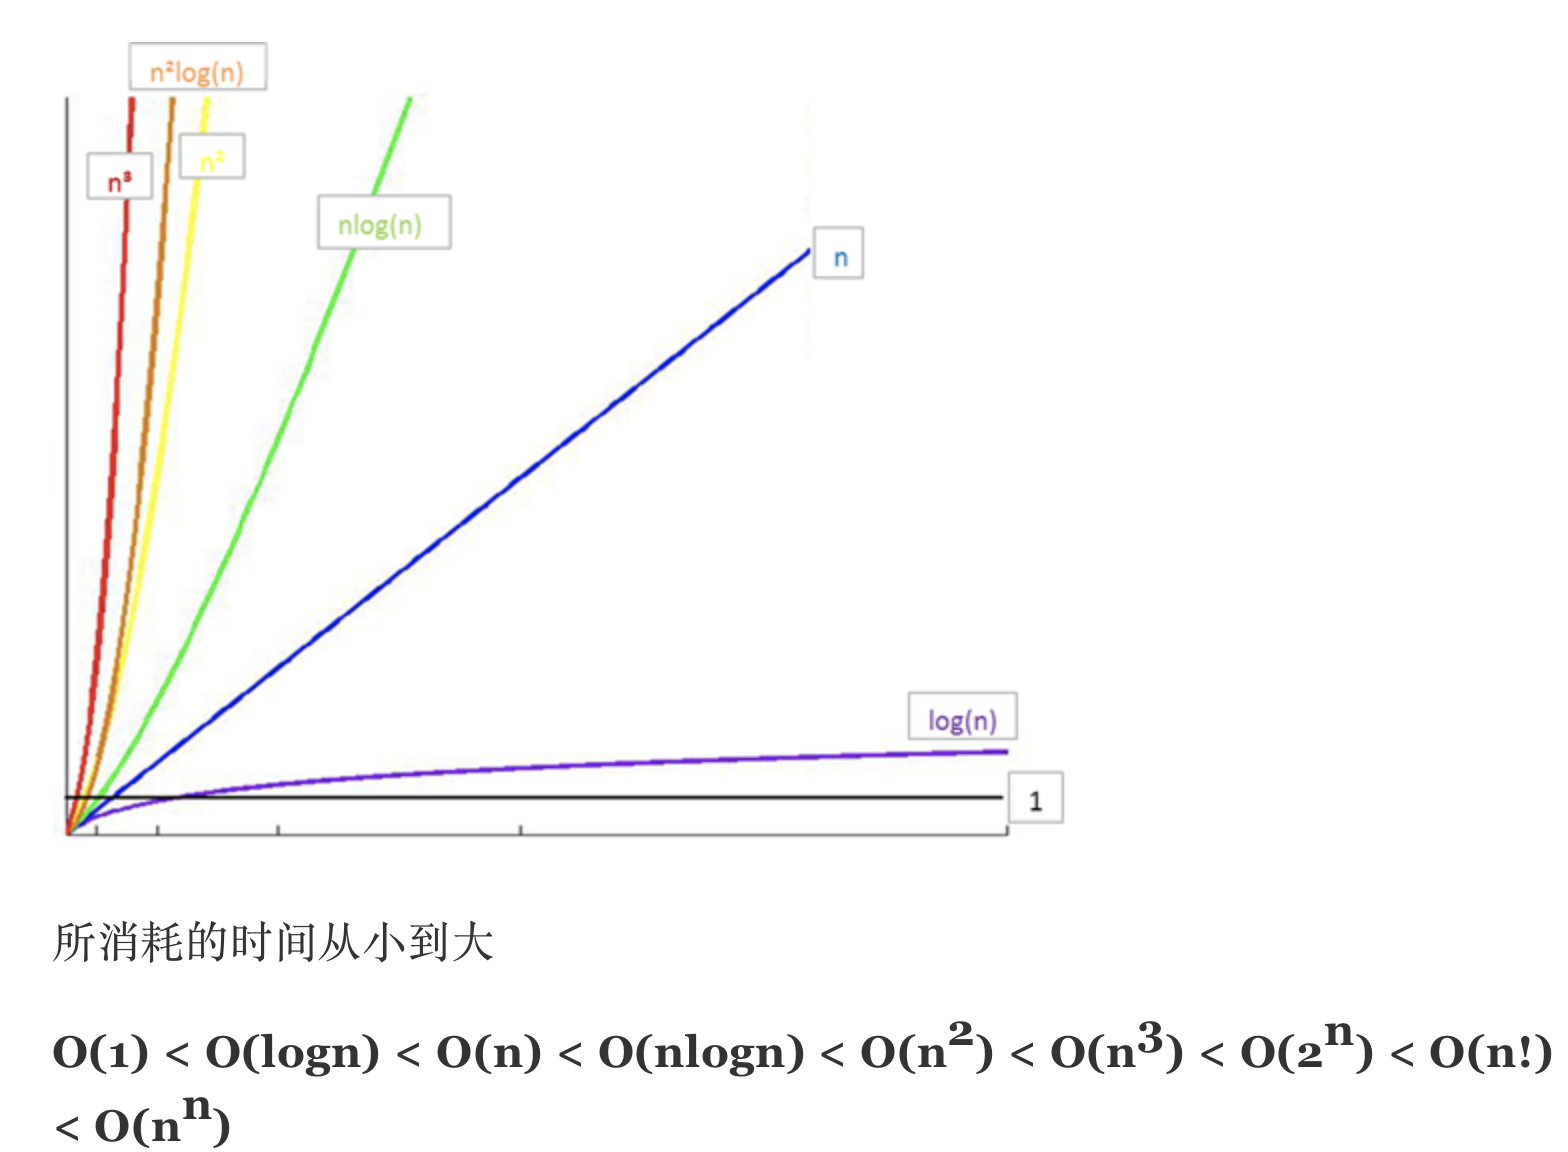

### 2.python内置类型性能分析

#### timeit模块  
timeit模块可以用来测试一小段Python代码的执行速度。

##### class timeit.Timer(stmt='pass', setup='pass', timer=<timer function>)

* Timer是测量小段代码执行速度的类。

* stmt参数是要测试的代码语句（statment）；

* setup参数是运行代码时需要的设置；

* timer参数是一个定时器函数，与平台有关。

##### timeit.Timer.timeit(number=1000000)

* Timer类中测试语句执行速度的对象方法。number参数是测试代码时的测试次数，默认为1000000次。方法返回执行代码的平均耗时，一个float类型的秒数。

list的操作测试

In [6]:
# 使用+法
def test1():
    li = []
    for i in range(10000):
        li = li + [i]  

# 使用append,  append只能插入单个元素
def test2():
    li = []
    for i in range(10000):
        li.append(i)

# 使用列表生成式
def test3():
    li = [i for i in range(10000)]

# 使用range函数直接转成list 
def test4():
    li = list(range(10000))
    
# 使用extend函数，与append的区别是它是在尾部插入的列表或者迭代式。
def test5():
    li = []
    for i in range(10000):
        li.extend([i]) 

from timeit import Timer
#构建一个对象，其中第一个参数是字符串类型，表示要执行的代码，第二个参数是必要设置
t1 = Timer("test1()", "from __main__ import test1") 
print("concat ",t1.timeit(number=1000), "seconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=1000), "seconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=1000), "seconds")
t4 = Timer("test4()", "from __main__ import test4")
print("list range ",t4.timeit(number=1000), "seconds")
t5 = Timer("test5()", "from __main__ import test5")
print("extend",t5.timeit(number=1000), "seconds")

concat  0.6388773709986708 seconds
append  0.5625370320012735 seconds
comprehension  0.25028491700140876 seconds
list range  0.13044183899910422 seconds
extend 0.8148793369982741 seconds


由上述代码实验结果可以看出：   
* 使用+号效率尤其低，是因为会新建一个变量，把➕号两边的列表都挪到新列表中。所以加号要少用。  
* append,extend的效率都比较低
* 使用列表生成式,或者是一个可见对象直接转list 的效率较高

 #### 导致这些的原因都是因为 列表的存储方式决定的  
 python中List和dict等数据类型都不是基本数据类型，其操作函数在算时间复杂度时候也不能算作一个基本操作  
 下面可以看List和dict的操作函数的复杂度。

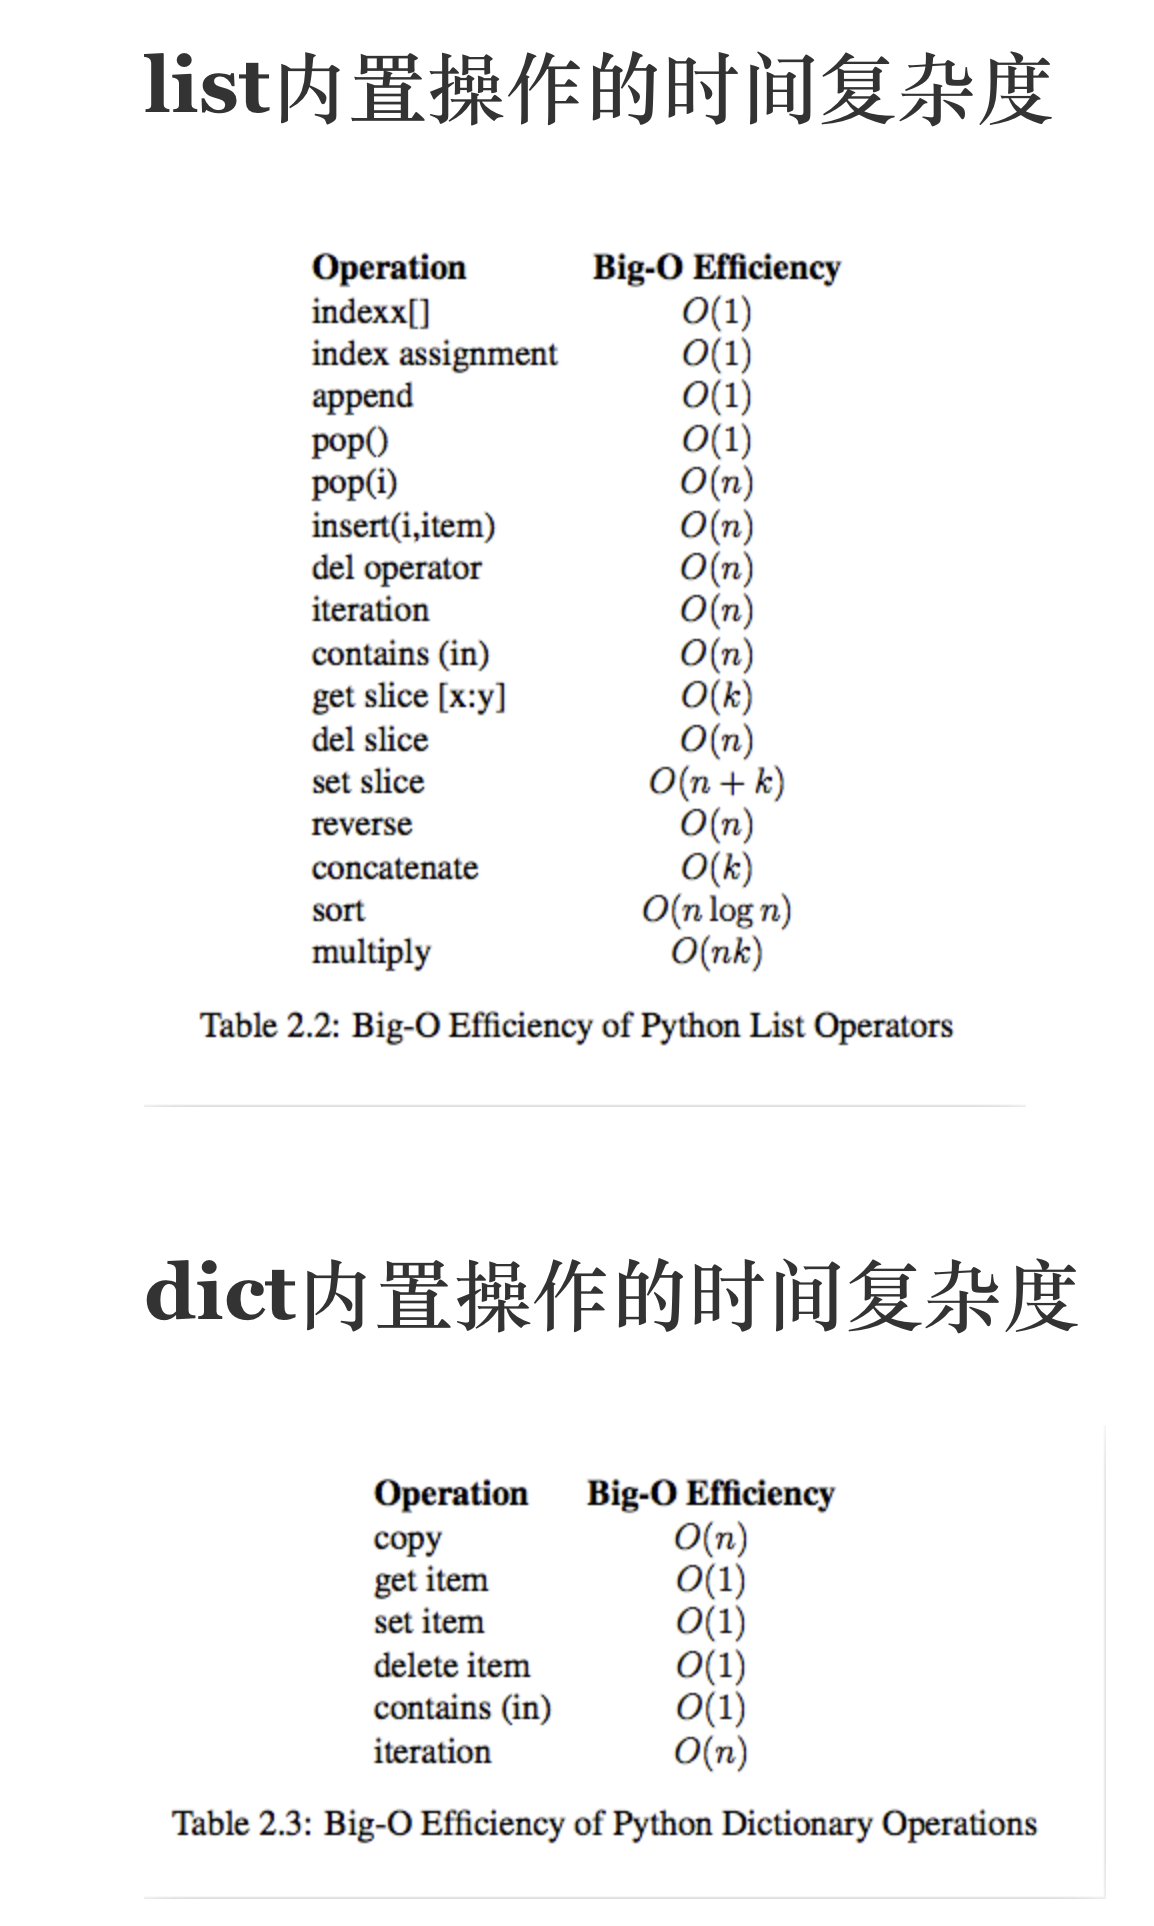

#### 3.抽象数据类型(Abstract Data Type)
抽象数据类型(ADT)的含义是指一个数学模型以及定义在此数学模型上的一组操作。即把数据类型和数据类型上的运算捆在一起，进行封装。

#### 4.算法与数据结构的区别
数据结构只是静态的描述了数据元素之间的关系。

高效的程序需要在数据结构的基础上设计和选择算法。

程序 = 数据结构 + 算法

总结：算法是为了解决实际问题而设计的，数据结构是算法需要处理的问题载体